In [7]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import matplotlib as mpl
import pandas as pd
import matplotlib.patches as mpatches  # Import for manual legend entries

In [8]:
import geopandas as gpd
import os

base_dir = "./cleaned_data/"

# Define file paths
files = {
    'boundaries': [
        os.path.join(base_dir, 'boundaries.json')
    ],
    'buildings': [
        os.path.join(base_dir, 'bures_buildings.json'),
        os.path.join(base_dir, 'massy_buildings.json'),
        os.path.join(base_dir, 'palaiseau_buildings.json'),
        os.path.join(base_dir, 'orsay_buildings.json'),
        os.path.join(base_dir, 'gif_buildings.json')
    ],
    'student_housing': [
        os.path.join(base_dir, 'student_housing.json')
    ],
    'isochrone': [
        os.path.join(base_dir, 'isochrone_data.json')
    ]
}

# Load data
json_data = {category: [gpd.read_file(f) for f in file_list] for category, file_list in files.items()}

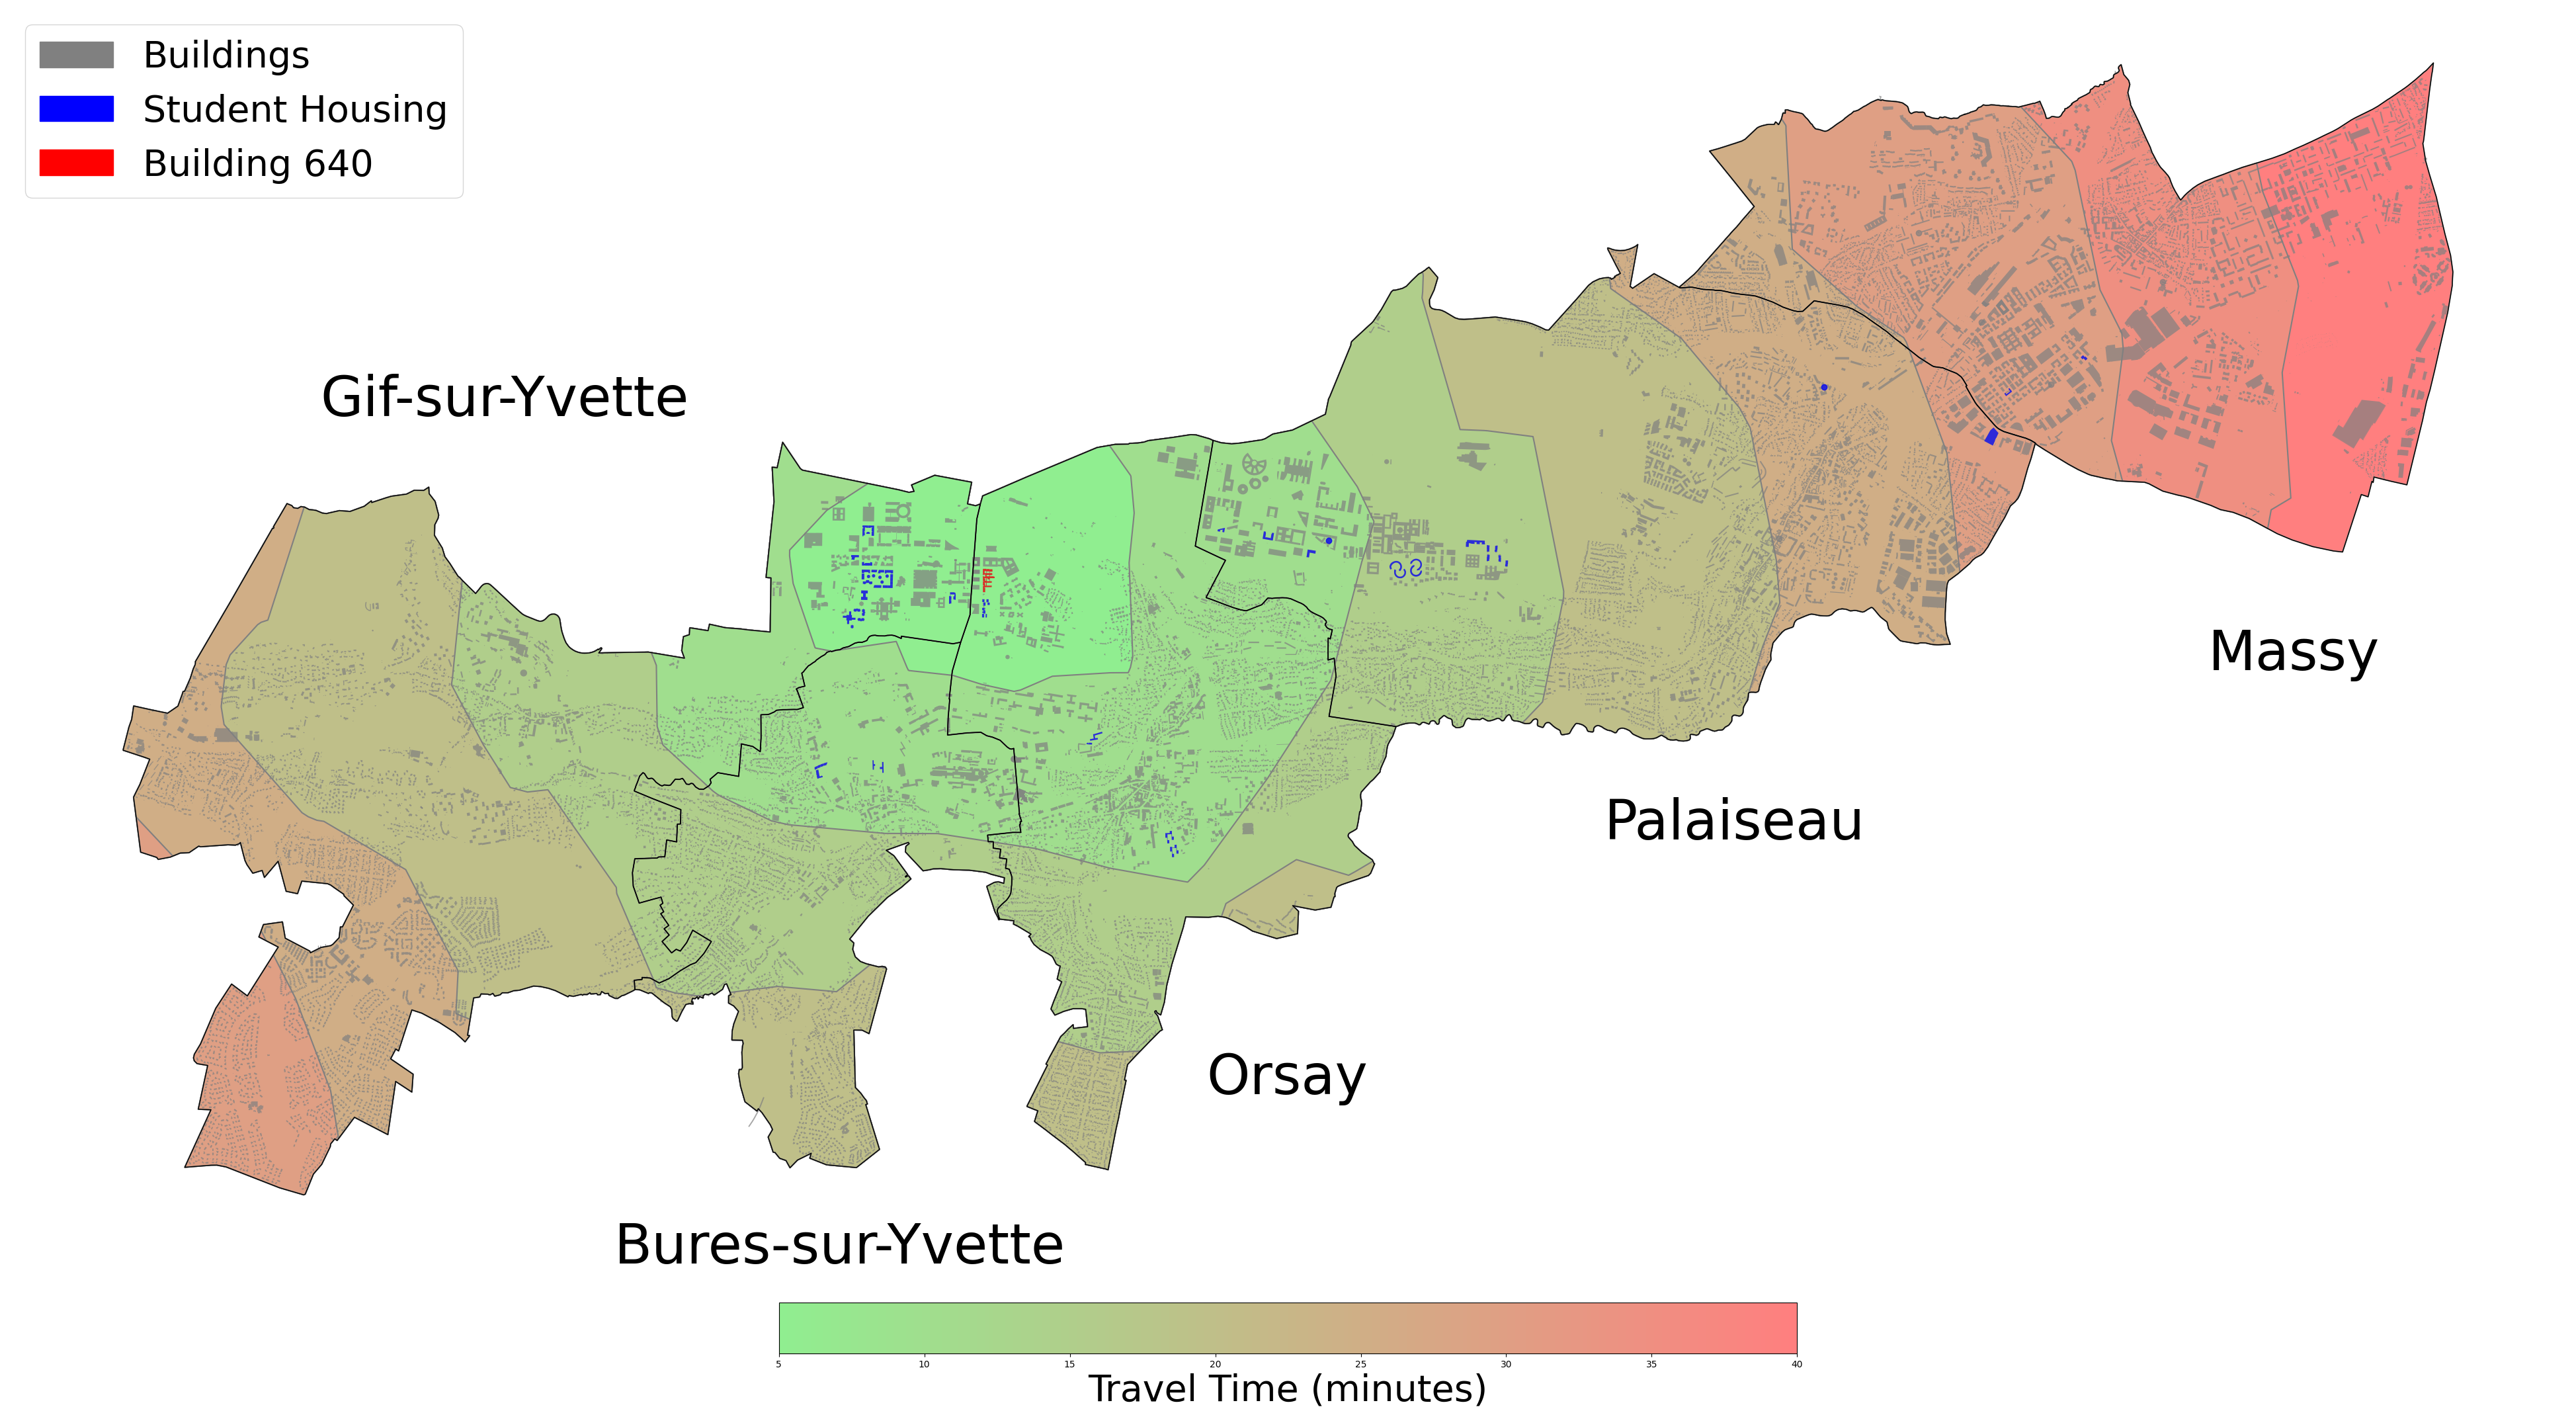

In [9]:
# MAP WITH LEGEND
iso_gdf = json_data['isochrone'][0]
boundaries = json_data['boundaries'][0]
buildings = gpd.GeoDataFrame(pd.concat(json_data['buildings'], ignore_index=True))
student_housing = json_data['student_housing'][0]
building_640 = gpd.read_file(os.path.join(base_dir, 'building_640.json'))

# Filter isochrones for specified times
time_intervals = [5, 10, 15, 20, 25, 30, 35, 40]
selected_isochrones = iso_gdf[iso_gdf['time min'].isin(time_intervals)]

# Clip isochrones by the town boundaries
clipped_isochrones = gpd.overlay(selected_isochrones, boundaries, how='intersection')

# Define a colormap from green to red
green_to_red = mpl.colors.LinearSegmentedColormap.from_list(
    "LightGreenLightRed", ["#90EE90", "#FF7F7F"]  # Light green to light red
)
cmap = green_to_red

# Normalize the color scale based on the time range
norm = mpl.colors.Normalize(vmin=clipped_isochrones['time min'].min(), vmax=clipped_isochrones['time min'].max())

fig, ax = plt.subplots(figsize=(50, 50))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Plot the clipped isochrones with color based on 'time min'
iso_plot = clipped_isochrones.plot(ax=ax, column='time min', cmap=cmap, linewidth=1.5, legend=False, edgecolor='gray',
                                   norm=norm, alpha=1)

# Add colorbar legend for travel time
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.02)
cbar.set_label("Travel Time (minutes)", fontsize=40)

# Plot different building categories
buildings.plot(ax=ax, color='gray', alpha=0.7)
student_housing.plot(ax=ax, color='blue', alpha=0.7)
building_640.plot(ax=ax, color='red', alpha=0.7)

# Plot the boundaries on top
boundaries.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# # Add town labels
for _, row in boundaries.iterrows():
        coords = eval(row['name_label_coords'])
        ax.text(coords[0], coords[1], row['name'], fontsize=60, ha='center')


# Create custom legend handles
legend_patches = [
    mpatches.Patch(color='gray', label='Buildings'),
    mpatches.Patch(color='blue', label='Student Housing'),
    mpatches.Patch(color='red', label='Building 640')
]

ax.legend(handles=legend_patches, loc='upper left', fontsize=40)

# Save the figure
fig.savefig('map.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()


In [10]:
student_housing

,town,info,address,id,geometry
0,Bures-sur-Yvette,De 309 à 454 € - Loyer toutes charges comprise...,None,0,"POLYGON ((2.16374 48.69956, 2.16386 48.69956, ..."
1,Bures-sur-Yvette,De 309 à 454 € - Loyer toutes charges comprise...,None,1,"POLYGON ((2.16289 48.69966, 2.16299 48.69966, ..."
2,Bures-sur-Yvette,De 369 à 477 € - Loyer toutes charges comprise...,None,2,"POLYGON ((2.15771 48.69926, 2.1577 48.6992, 2...."
3,Bures-sur-Yvette,De 369 à 477 € - Loyer toutes charges comprise...,None,3,"POLYGON ((2.15788 48.69878, 2.15791 48.69879, ..."
4,Orsay,"De 266 € à 541 €, loyer toutes charges compris...",None,4,"POLYGON ((2.18943 48.69477, 2.18925 48.69476, ..."
...,...,...,...,...,...
63,Gif-sur-Yvette,De 391e/mois à 758e/mois,"1 Rue Joliot-Curie, 91190 Gif sur Yvette",63,"POLYGON ((2.16193 48.71092, 2.16266 48.71091, ..."
64,Gif-sur-Yvette,De 391e/mois à 758e/mois,"1 Rue Joliot-Curie, 91190 Gif sur Yvette",64,"POLYGON ((2.16345 48.7109, 2.16392 48.71089, 2..."
65,Gif-sur-Yvette,De 391e/mois à 758e/mois,"1 Rue Joliot-Curie, 91190 Gif sur Yvette",65,"POLYGON ((2.16249 48.7135, 2.16253 48.7135, 2...."
66,Gif-sur-Yvette,De 391e/mois à 758e/mois,"1 Rue Joliot-Curie, 91190 Gif sur Yvette",66,"POLYGON ((2.16279 48.71091, 2.16331 48.7109, 2..."
